In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
#建立資料

#建立表格
df = pd.DataFrame(columns = ['Class', 'Drink', 'Rank', 'Num'])
#df

#Coke
for i in range(200):
  x = random.gauss(mu=100, sigma=200)
  new_row = [(1, 'Coke', 7, x)]
  dfnew = pd.DataFrame(new_row, columns = ['Class', 'Drink', 'Rank', 'Num'])
  df = df.append(dfnew, ignore_index=True)

#Pepsi
for i in range(100):
  x = random.gauss(mu=200, sigma=10)
  new_row = [(2, 'Pepsi', 6, x)]
  dfnew = pd.DataFrame(new_row, columns = ['Class', 'Drink', 'Rank', 'Num'])
  df = df.append(dfnew, ignore_index=True)

#7Up
for i in range(100):
  x = random.gauss(mu=200, sigma=10)
  new_row = [(3, '7Up', 5, x)]
  dfnew = pd.DataFrame(new_row, columns = ['Class', 'Drink', 'Rank', 'Num'])
  df = df.append(dfnew, ignore_index=True)

#Sprite
for i in range(200):
  x = random.gauss(mu=400, sigma=100)
  new_row = [(4, 'Sprite', 4, x)]
  dfnew = pd.DataFrame(new_row, columns = ['Class', 'Drink', 'Rank', 'Num'])
  df = df.append(dfnew, ignore_index=True)

#Latte
for i in range(100):
  x = random.gauss(mu=800, sigma=10)
  new_row = [(5, 'Latte', 3, x)]
  dfnew = pd.DataFrame(new_row, columns = ['Class', 'Drink', 'Rank', 'Num'])
  df = df.append(dfnew, ignore_index=True)

#Espresso
for i in range(100):
  x = random.gauss(mu=800, sigma=10)
  new_row = [(6, 'Espresso', 2, x)]
  dfnew = pd.DataFrame(new_row, columns = ['Class', 'Drink', 'Rank', 'Num'])
  df = df.append(dfnew, ignore_index=True)

#Cappuccino
for i in range(200):
  x = random.gauss(mu=900, sigma=400)
  new_row = [(7, 'Cappuccino', 1, x)]
  dfnew = pd.DataFrame(new_row, columns = ['Class', 'Drink', 'Rank', 'Num'])
  df = df.append(dfnew, ignore_index=True)

df

,Class,Drink,Rank,Num
0,1,Coke,7,167.342758
1,1,Coke,7,264.714372
2,1,Coke,7,219.980597
3,1,Coke,7,200.028399
4,1,Coke,7,348.418338
...,...,...,...,...
995,7,Cappuccino,1,256.913159
996,7,Cappuccino,1,1264.679226
997,7,Cappuccino,1,428.519595
998,7,Cappuccino,1,1597.483186


In [3]:
#轉換資料型態
df['Class'] = df['Class'].astype('int')
df['Rank'] = df['Rank'].astype('int')
df['Num'] = df['Num'].astype('float')

df.dtypes

Class      int32
Drink     object
Rank       int32
Num      float64
dtype: object

In [4]:
#1-of-k

df_drink = pd.DataFrame(df['Drink'])
print(df_drink)

          Drink
0          Coke
1          Coke
2          Coke
3          Coke
4          Coke
..          ...
995  Cappuccino
996  Cappuccino
997  Cappuccino
998  Cappuccino
999  Cappuccino

[1000 rows x 1 columns]


In [5]:
df_drink_label = df_drink
#One hot encoding
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
onehotencoder.fit(df_drink_label)
drink_onehot = onehotencoder.transform(df_drink_label).toarray()
print(drink_onehot.shape)
print(drink_onehot)
df_drink_onehot = pd.DataFrame(drink_onehot,columns = ['Drink_7Up', 'Drink_Cappuccino', 'Drink_Coke', 'Drink_Espresso', 'Drink_Latte', 'Drink_Pepsi', 'Drink_Sprite'])
print(df_drink_onehot)

(1000, 7)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
     Drink_7Up  Drink_Cappuccino  Drink_Coke  Drink_Espresso  Drink_Latte  \
0          0.0               0.0         1.0             0.0          0.0   
1          0.0               0.0         1.0             0.0          0.0   
2          0.0               0.0         1.0             0.0          0.0   
3          0.0               0.0         1.0             0.0          0.0   
4          0.0               0.0         1.0             0.0          0.0   
..         ...               ...         ...             ...          ...   
995        0.0               1.0         0.0             0.0          0.0   
996        0.0               1.0         0.0             0.0          0.0   
997        0.0               1.0         0.0             0.0          0.0   
998        0.0               1.0         0.0             0.0    

In [6]:
#合併表格
df_ranknum = pd.DataFrame(df[['Rank', 'Num']])
print(df_ranknum)
df_oneofk = pd.concat([df_drink_onehot, df_ranknum], axis=1)
df_oneofk

     Rank          Num
0       7   167.342758
1       7   264.714372
2       7   219.980597
3       7   200.028399
4       7   348.418338
..    ...          ...
995     1   256.913159
996     1  1264.679226
997     1   428.519595
998     1  1597.483186
999     1   342.307123

[1000 rows x 2 columns]


,Drink_7Up,Drink_Cappuccino,Drink_Coke,Drink_Espresso,Drink_Latte,Drink_Pepsi,Drink_Sprite,Rank,Num
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,167.342758
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,264.714372
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,219.980597
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,200.028399
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,348.418338
...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,256.913159
996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1264.679226
997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,428.519595
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1597.483186


In [4]:

#
##Label encoding
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#df_drink_label = df_drink.apply(labelencoder.fit_transform)
#print(df_drink_label)
#
##One hot encoding
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder()
#onehotencoder.fit(df_drink_label)
#drink_onehot = onehotencoder.transform(df_drink_label).toarray()
#print(drink_onehot.shape)
#print(drink_onehot)
#df_drink_onehot = pd.DataFrame(drink_onehot,columns = ['Drink_7Up', 'Drink_Cappuccino', 'Drink_Coke', 'Drink_Espresso', 'Drink_Latte', 'Drink_Pepsi', 'Drink_Sprite'])
#print(df_drink_onehot)
#
##合併表格
#df_ranknum = pd.DataFrame(df[['Rank', 'Num']])
#print(df_ranknum)
#df_oneofk = pd.concat([df_drink_onehot, df_ranknum], axis=1)
#df_oneofk

          Drink
0          Coke
1          Coke
2          Coke
3          Coke
4          Coke
..          ...
995  Cappuccino
996  Cappuccino
997  Cappuccino
998  Cappuccino
999  Cappuccino

[1000 rows x 1 columns]
     Drink
0        2
1        2
2        2
3        2
4        2
..     ...
995      1
996      1
997      1
998      1
999      1

[1000 rows x 1 columns]
(1000, 7)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
     Drink_7Up  Drink_Cappuccino  ...  Drink_Pepsi  Drink_Sprite
0          0.0               0.0  ...          0.0           0.0
1          0.0               0.0  ...          0.0           0.0
2          0.0               0.0  ...          0.0           0.0
3          0.0               0.0  ...          0.0           0.0
4          0.0               0.0  ...          0.0           0.0
..         ...               ...  ...          ...           ...
995  

,Drink_7Up,Drink_Cappuccino,Drink_Coke,Drink_Espresso,Drink_Latte,Drink_Pepsi,Drink_Sprite,Rank,Num
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,-21.854032
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,236.900648
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,-31.327644
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,-106.461799
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,204.508323
...,...,...,...,...,...,...,...,...,...
995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,229.724875
996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,926.775025
997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1162.078125
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,477.647180


In [7]:
#df_oneofk
#Y_data_class

from sklearn.manifold import TSNE
X_tsnea = TSNE(n_components=2).fit_transform(df_oneofk)
print(X_tsnea.shape)

(1000, 2)


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Text(0.5, 1.0, 'TSNE')

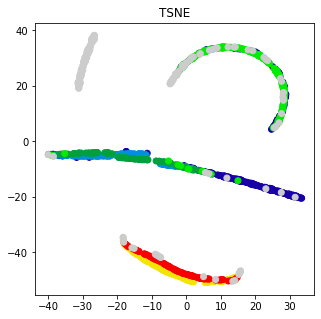

In [8]:
%pylab inline
figure(figsize=(11, 5))
cmap = plt.get_cmap('nipy_spectral')

types1 = df['Class'].unique()
type1_ids = df['Class'].unique()
num_types1 = len(types1)

subplot(1,2,1)
scatter(X_tsnea[:, 0], X_tsnea[:, 1], c=cmap(df['Class'] / num_types1))
title('TSNE')

In [9]:
df_class = pd.DataFrame(df['Class'])
df_class

,Class
0,1
1,1
2,1
3,1
4,1
...,...
995,7
996,7
997,7
998,7


In [10]:
x_min, x_max = X_tsnea.min(0), X_tsnea.max(0)
X_norm = (X_tsnea - x_min)/(x_max - x_min)
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(df_class[i]), color=plt.cm.Set1(df_class[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

KeyError: 0

<Figure size 576x576 with 0 Axes>